In [79]:
%matplotlib inline

In [80]:
#
# Covariates are: 
#   - Number of unique CpGs per cell
#   - Median Average Read CpG per cell (or mean if normally distributed)
#   - BS rate per cell
#   - CLL or Normal status per cell
#
# For distances (i.e. PDR difference between pairs, methylation difference between pairs), 
# the covariates are the mean between the two pairs. 
# 

In [81]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

import statsmodels.api as sm

In [82]:
stats = pd.read_csv("all_RRBS_statistics_final.csv")

In [83]:
stats.shape

(438, 15)

In [84]:
normal = stats[stats["type"]=="normal"]
CLL = stats[stats["type"]=="CLL"]

In [85]:
len(normal)

336

In [86]:
len(CLL)

102

In [87]:
mcell_cpg = pd.read_csv("mcell_avgCpGs.csv")
pcell_cpg = pd.read_csv("pcell_avgCpGs.csv")
CD19cell_cpg = pd.read_csv("CD19_avgCpGs.csv")
normalB_cell_cpg = pd.read_csv("normalB_avgCpGs.csv")
trito_cell_cpg = pd.read_csv("trito_avgCpGs.csv")
cw154_cell_cpg = pd.read_csv("cw154_cpgs.csv")

In [88]:
mcell_cpg = mcell_cpg.drop(["Unnamed: 0"], axis=1)
pcell_cpg = pcell_cpg.drop(["Unnamed: 0"], axis=1)
CD19cell_cpg = CD19cell_cpg.drop(["Unnamed: 0"], axis=1)
normalB_cell_cpg = normalB_cell_cpg.drop(["Unnamed: 0"], axis=1)
trito_cell_cpg = trito_cell_cpg.drop(["Unnamed: 0"], axis=1)
cw154_cell_cpg = cw154_cell_cpg.drop(["Unnamed: 0"], axis=1)

In [89]:
cpg_total = pd.concat([mcell_cpg, pcell_cpg, CD19cell_cpg, normalB_cell_cpg, trito_cell_cpg, cw154_cell_cpg])

In [90]:
cpg_total.shape

(513, 4)

In [91]:
merged = stats.merge(cpg_total, on="filename")

In [92]:
merged.shape

(438, 18)

In [93]:
merged.head()

,filename,methylation,PDR_total,methylation_unweighted,PDR_unweighted,thisMeth,mixedReadCount,total_reads,type,bio,protocol,total_cpg_no_filter,total_cpg_gtrthan1,total_cpg_gtrthan38,bsRate,avgReadCpgs_nofilter,avgReadCpgs_lessthan1CpG,avgReadCpgs_gtreql3.8CpG
0,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.CATGAC,0.529505,0.235795,0.632802,0.231878,2208325.0,983394.0,4170549.0,normal,CD19CD27m,NormalBCD19pCD27mcell67_88,525282.0,525251.0,435636.0,0.9975,5.354284,5.355660,7.019255
1,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.CCTTCG,0.455550,0.177631,0.583859,0.175371,733064.0,285841.0,1609185.0,normal,CD19CD27m,NormalBCD19pCD27mcell67_88,221972.0,221962.0,186757.0,0.9975,5.587294,5.588449,7.302612
2,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.CGGTAG,0.515269,0.177645,0.618578,0.174221,1452802.0,500870.0,2819500.0,normal,CD19CD27m,NormalBCD19pCD27mcell67_88,355730.0,355713.0,295624.0,0.9975,5.393199,5.394331,7.079288
3,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.CTATTG,0.556175,0.176367,0.652727,0.172273,2279354.0,722800.0,4098270.0,normal,CD19CD27m,NormalBCD19pCD27mcell67_88,483179.0,483150.0,397812.0,0.9975,5.287116,5.288477,6.979525
4,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.CTCAGC,0.528642,0.181331,0.640401,0.172287,1394208.0,478231.0,2637340.0,normal,CD19CD27m,NormalBCD19pCD27mcell67_88,356122.0,356100.0,294065.0,0.9975,5.314302,5.315719,6.995052


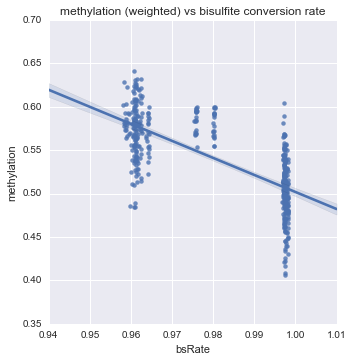

In [102]:
sns.lmplot(x="bsRate", y="methylation",  data=merged)
plt.title("methylation (weighted) vs bisulfite conversion rate")

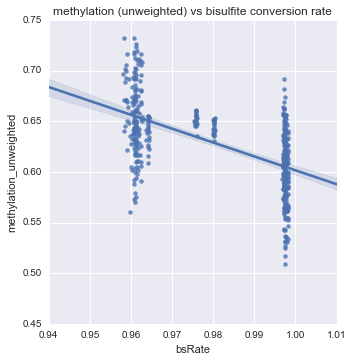

In [105]:
sns.lmplot(x="bsRate", y="methylation_unweighted",  data=merged)
plt.title("methylation (unweighted) vs bisulfite conversion rate")

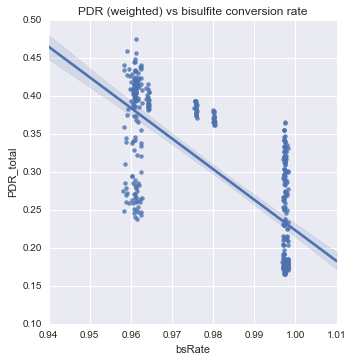

In [106]:
sns.lmplot(x="bsRate", y="PDR_total",  data=merged)
plt.title("PDR (weighted) vs bisulfite conversion rate")

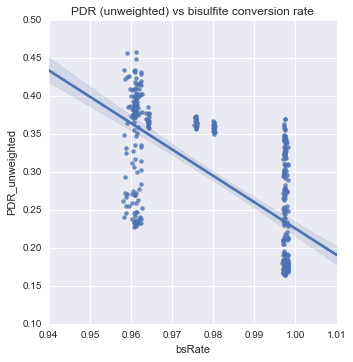

In [107]:
sns.lmplot(x="bsRate", y="PDR_unweighted",  data=merged)
plt.title("PDR (unweighted) vs bisulfite conversion rate")

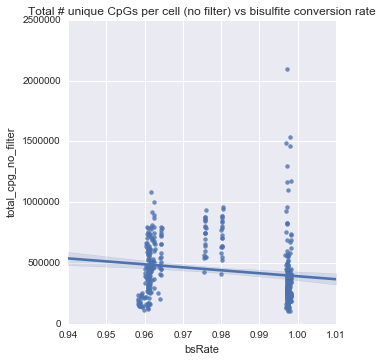

In [112]:
sns.lmplot(x="bsRate", y="total_cpg_no_filter",  data=merged)
plt.title("Total # unique CpGs per cell (no filter) vs bisulfite conversion rate")

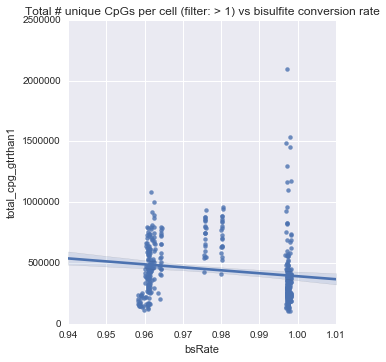

In [113]:
sns.lmplot(x="bsRate", y="total_cpg_gtrthan1",  data=merged)
plt.title("Total # unique CpGs per cell (filter: > 1) vs bisulfite conversion rate")

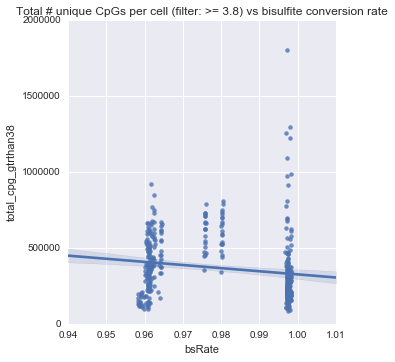

In [114]:
sns.lmplot(x="bsRate", y="total_cpg_gtrthan38",  data=merged)
plt.title("Total # unique CpGs per cell (filter: >= 3.8) vs bisulfite conversion rate")

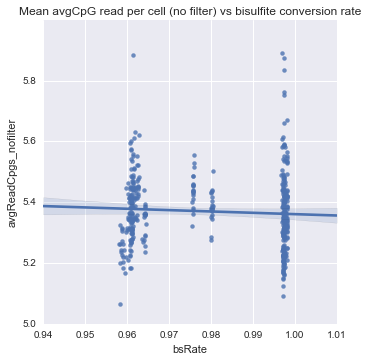

In [117]:
sns.lmplot(x="bsRate", y="avgReadCpgs_nofilter",  data=merged)
plt.title("Mean avgCpG read per cell (no filter) vs bisulfite conversion rate")

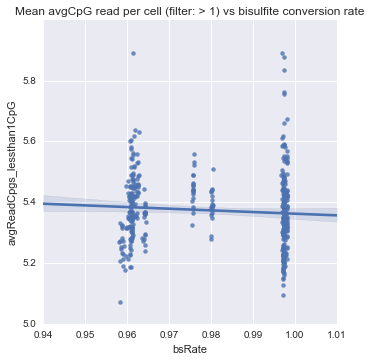

In [118]:
sns.lmplot(x="bsRate", y="avgReadCpgs_lessthan1CpG",  data=merged)
plt.title("Mean avgCpG read per cell (filter: > 1) vs bisulfite conversion rate")

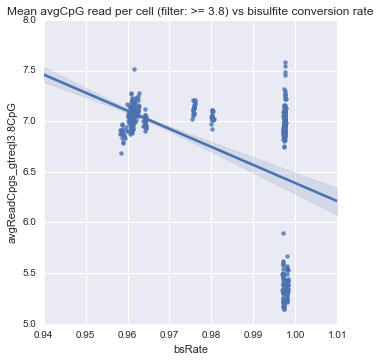

In [119]:
sns.lmplot(x="bsRate", y="avgReadCpgs_gtreql3.8CpG",  data=merged)
plt.title("Mean avgCpG read per cell (filter: >= 3.8) vs bisulfite conversion rate")

In [191]:
tritopool = merged[merged["protocol"] == 'trito_pool_1']       # select only "trito_pool_1" files
tritopool = tritopool.drop(["thisMeth", "mixedReadCount", "bio", "protocol"], axis=1) # will not need these columns; efficiency
tritopoolA = tritopool.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool.filename,2)) # combines into all pairs
out = pd.DataFrame([tritopoolA.loc[c,:].mean() for c in cc], index=cc)  # covariates between pairs == mean
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool.methylation, tritopool.methylation)), tritopool.filename, tritopool.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs = pd.merge(out, methylation_differences, how='inner')
print(pairs.shape)
pairs = pairs.rename(columns = {'total_reads':'total_reads_mean', "bsRate":"bsRate_mean", "avgReadCpgs_nofilter":"avgReadCpG_mean"})

y = pairs.methylation_difference # dependent variable to predict

X = pairs.drop(["methylation_difference", "filename", "methylation", "PDR_total", "methylation_unweighted", "PDR_unweighted", "total_reads_mean",
               "total_cpg_gtrthan1", "total_cpg_gtrthan38", "avgReadCpgs_lessthan1CpG", "avgReadCpgs_gtreql3.8CpG"], axis=1)

print(y.shape)
print(X.shape)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results for CLL 'RRBS_trito_pool1', predict methylation")
print("")
print("Variates used are " + str(X.columns))
print("")
est.summary()

(210, 14)
(210,)
(210, 3)
Regression results for CLL 'RRBS_trito_pool1', predict methylation

Variates used are Index(['const', 'total_cpg_no_filter', 'bsRate_mean', 'avgReadCpG_mean'], dtype='object')



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     methylation_difference   R-squared:                       0.058
Model:                                OLS   Adj. R-squared:                  0.044
Method:                     Least Squares   F-statistic:                     4.225
Date:                    Tue, 09 Aug 2016   Prob (F-statistic):            0.00633
Time:                            15:01:24   Log-Likelihood:                 635.49
No. Observations:                     210   AIC:                            -1263.
Df Residuals:                         206   BIC:                            -1250.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                 -29.7869     11.327     -2.630      0.009       -52.119    -7.455
total_cpg_no_filter -4.194e-08   1.27e-08     -3.314      0.001     -6.69e-08  -1.7e-08
bsRate_mean            30.0727     11.557      2.602      0.010         7.288    52.858
avgReadCpG_mean         0.0665      0.030      2.179      0.030         0.006     0.127
==============================================================================
Omnibus:                       36.210   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.249
Skew:                           0.219   Prob(JB):                      0.00595
Kurtosis:                       2.010   Cond. No.                     1.46e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


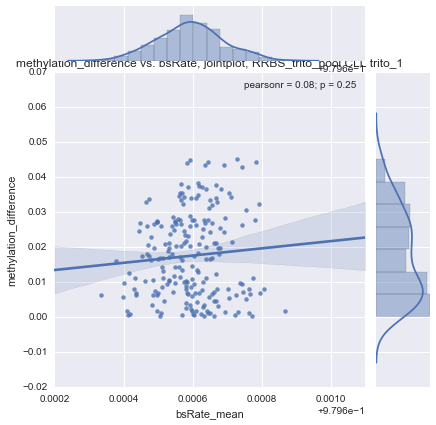

In [189]:
sns.jointplot(x="bsRate_mean", y="methylation_difference",  data=pairs, kind="reg")
plt.title("methylation_difference vs. bsRate, jointplot, RRBS_trito_pool CLL trito_1")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


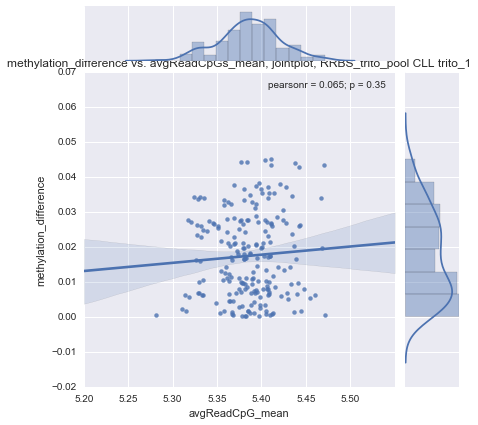

In [192]:
sns.jointplot(x="avgReadCpG_mean", y="methylation_difference",  data=pairs, kind="reg")
plt.title("methylation_difference vs. avgReadCpGs_mean, jointplot, RRBS_trito_pool CLL trito_1")


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


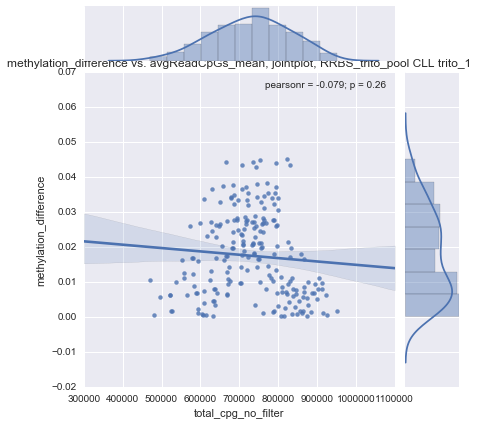

In [193]:
sns.jointplot(x="total_cpg_no_filter", y="methylation_difference",  data=pairs, kind="reg")
plt.title("methylation_difference vs. avgReadCpGs_mean, jointplot, RRBS_trito_pool CLL trito_1")